----------------------
# Project Name: House Price Prediction
______________________________________

#### Dataset: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data?select=Bengaluru_House_Data.csv
________________________________________________________________________________________________________________________

-------

# LOADING DATA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Housing=pd.read_csv('/content/drive/MyDrive/hello/Bengaluru_House_Data.csv')

In [6]:
Housing.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

# DATA PRE-PROCESSING

### Dropping the 'society' column


In [7]:
Housing=Housing.drop(["society"],axis=1)

In [8]:
Housing.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

### Dropping the rows where 'location' has null values

In [9]:
Housing=Housing.dropna(subset=["location"])

In [10]:
Housing.isna().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

### Checking the Correlation of the features

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [12]:
check_corr=Housing.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [14]:
encoder=OrdinalEncoder()

In [15]:
check_corr_encoded=encoder.fit_transform(check_corr)

In [16]:
check_corr_encoded_corr=pd.DataFrame(check_corr_encoded).corr()

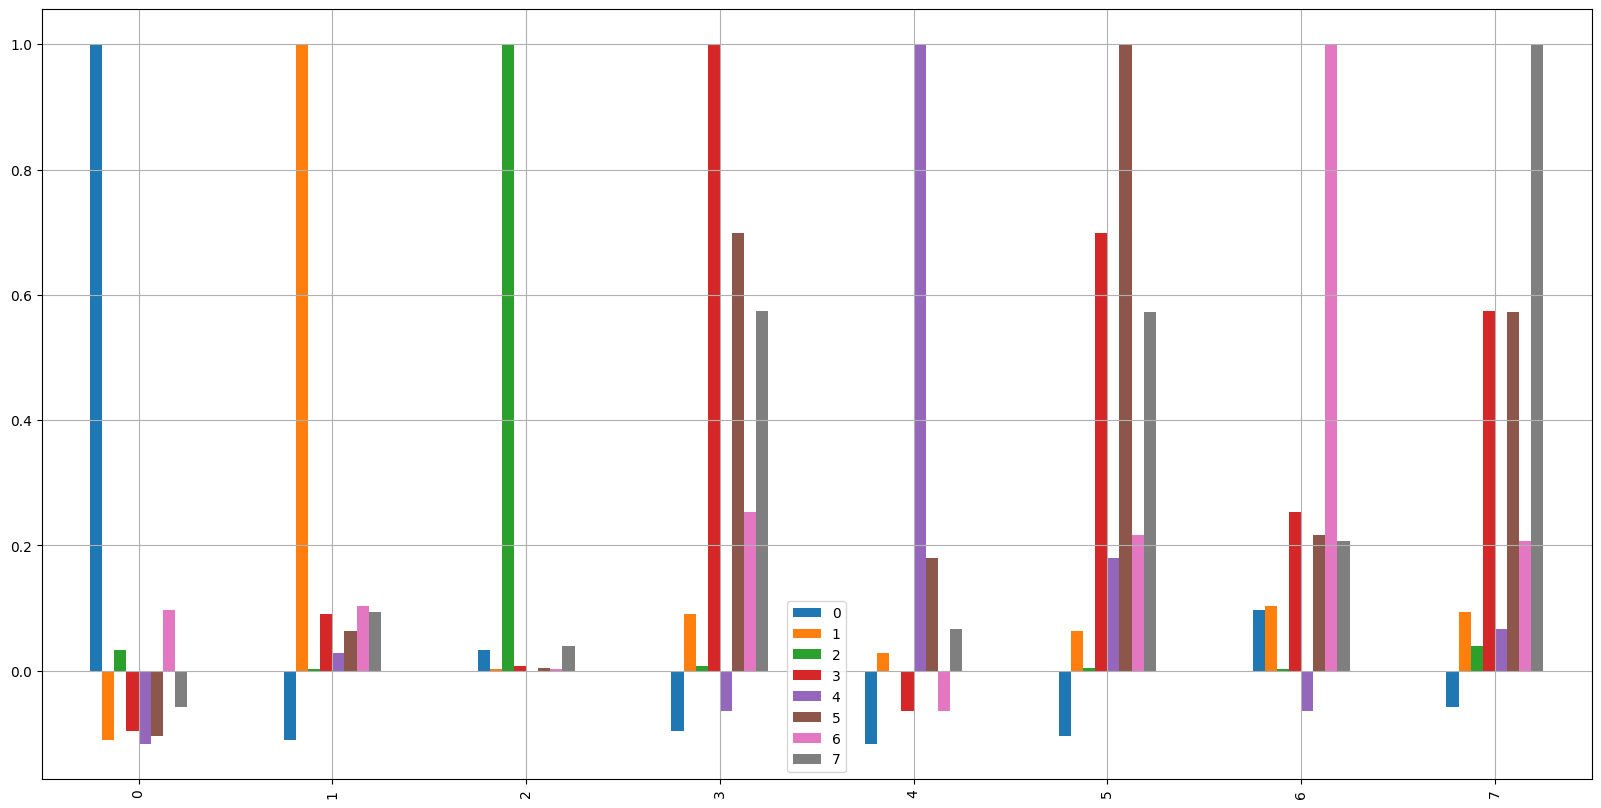

In [17]:
check_corr_encoded_corr.plot(kind="bar",figsize=(20,10),grid=True,legend=True)
plt.show()

### Filling the null values of 'balcony' with the median value

In [18]:
Housing.count().sort_values(ascending=False)

area_type       13319
availability    13319
location        13319
total_sqft      13319
price           13319
size            13303
bath            13246
balcony         12710
dtype: int64

In [19]:
median_balcony=Housing["balcony"].median()

In [20]:
Housing["balcony"].fillna(value=median_balcony,inplace=True)

<ipython-input-20-cd9d9292e633>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Housing["balcony"].fillna(value=median_balcony,inplace=True)


In [21]:
Housing.count().sort_values(ascending=False)

area_type       13319
availability    13319
location        13319
total_sqft      13319
balcony         13319
price           13319
size            13303
bath            13246
dtype: int64

### Dropping the rows where 'size' has null values

In [22]:
Housing=Housing.dropna(subset=["size"])

In [23]:
Housing.count().sort_values(ascending=False)

area_type       13303
availability    13303
location        13303
size            13303
total_sqft      13303
balcony         13303
price           13303
bath            13246
dtype: int64

### Filling the null values of 'bath' with the median value

In [24]:
Housing["bath"]=Housing["bath"].fillna(value=Housing["bath"].median())

<ipython-input-24-9c261a3e6b78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Housing["bath"]=Housing["bath"].fillna(value=Housing["bath"].median())


In [25]:
Housing.count().sort_values(ascending=False)

area_type       13303
availability    13303
location        13303
size            13303
total_sqft      13303
bath            13303
balcony         13303
price           13303
dtype: int64

### Encoding the features: 'area_type', 'availability', 'location'


In [26]:
df=Housing.copy()

In [27]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00

In [28]:
len(Housing["area_type"].unique())

4

In [29]:
df = pd.get_dummies(df, columns=['area_type', 'availability', 'location'], drop_first=True)

In [30]:
df.head()

size total_sqft  bath  balcony   price  area_type_Carpet  Area  \
0      2 BHK       1056   2.0      1.0   39.07                   False   
1  4 Bedroom       2600   5.0      3.0  120.00                   False   
2      3 BHK       1440   2.0      3.0   62.00                   False   
3      3 BHK       1521   3.0      1.0   95.00                   False   
4      2 BHK       1200   2.0      1.0   51.00                   False   

   area_type_Plot  Area  area_type_Super built-up  Area  availability_14-Nov  \
0                 False                            True                False   
1                  True                           False                False   
2                 False                           False                False   
3                 False                            True                False   
4                 False                            True                False   

   availability_15-Aug  ...  location_rr nagar  location_sankeswari  \
0                False  ...              False                False   
1                False  ...              False                False   
2                False  ...              False                False   
3                False  ...              False                False   
4                False  ...              False                False   

   location_sapthagiri Layout  location_sarjapura main road  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   location_singapura paradise  location_t.c palya  location_tc.palya  \
0                        False               False              False   
1                        False               False              False   
2                        False               False              False   
3                        False               False              False   
4                        False               False              False   

   location_vinayakanagar  location_white field,kadugodi  location_whitefiled  
0                   False                          False                False  
1                   False                          False                False  
2                   False                          False                False  
3                   False                          False                False  
4                   False                          False                False  

[5 rows x 1390 columns]

### Encoding the feature: 'size'

In [31]:
df['size'] = df['size'].astype('category').cat.codes

In [32]:
df["size"].unique()

array([13, 19, 16, 18, 24, 17,  0,  2,  1, 28, 14, 26, 21, 25, 23, 22,  5,
       29, 30, 15,  4,  6,  3, 12, 10, 20,  9, 27,  7,  8, 11], dtype=int8)

In [33]:
len(df["size"].unique())

31

In [34]:
df.head()

size total_sqft  bath  balcony   price  area_type_Carpet  Area  \
0    13       1056   2.0      1.0   39.07                   False   
1    19       2600   5.0      3.0  120.00                   False   
2    16       1440   2.0      3.0   62.00                   False   
3    16       1521   3.0      1.0   95.00                   False   
4    13       1200   2.0      1.0   51.00                   False   

   area_type_Plot  Area  area_type_Super built-up  Area  availability_14-Nov  \
0                 False                            True                False   
1                  True                           False                False   
2                 False                           False                False   
3                 False                            True                False   
4                 False                            True                False   

   availability_15-Aug  ...  location_rr nagar  location_sankeswari  \
0                False  ...              False                False   
1                False  ...              False                False   
2                False  ...              False                False   
3                False  ...              False                False   
4                False  ...              False                False   

   location_sapthagiri Layout  location_sarjapura main road  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   location_singapura paradise  location_t.c palya  location_tc.palya  \
0                        False               False              False   
1                        False               False              False   
2                        False               False              False   
3                        False               False              False   
4                        False               False              False   

   location_vinayakanagar  location_white field,kadugodi  location_whitefiled  
0                   False                          False                False  
1                   False                          False                False  
2                   False                          False                False  
3                   False                          False                False  
4                   False                          False                False  

[5 rows x 1390 columns]

### Feature Engineering of 'total_sqft'
Coverting the range-values of 'total_sqft' to float using the mean.

Dropping rows where 'total_sqft' has string values.

Filling the null values of 'total_sqft' with the medain value.

In [35]:
def sqrt_ft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
df["total_sqft"]=df["total_sqft"].apply(sqrt_ft_to_num)

In [37]:
index_to_delete = df[df['total_sqft'] == '38Guntha'].index

df = df.drop(index_to_delete)

df = df.reset_index(drop=True)


In [38]:
print(index_to_delete)

Index([], dtype='int64')


In [39]:
median_sqft=df["total_sqft"].median()

In [40]:
df["total_sqft"].fillna(value=median_sqft,inplace=True)

<ipython-input-40-8706b7f547a7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_sqft"].fillna(value=median_sqft,inplace=True)


In [41]:
df.head(10)

size  total_sqft  bath  balcony   price  area_type_Carpet  Area  \
0    13      1056.0   2.0      1.0   39.07                   False   
1    19      2600.0   5.0      3.0  120.00                   False   
2    16      1440.0   2.0      3.0   62.00                   False   
3    16      1521.0   3.0      1.0   95.00                   False   
4    13      1200.0   2.0      1.0   51.00                   False   
5    13      1170.0   2.0      1.0   38.00                   False   
6    18      2732.0   4.0      2.0  204.00                   False   
7    18      3300.0   4.0      2.0  600.00                   False   
8    16      1310.0   3.0      1.0   63.25                   False   
9    24      1020.0   6.0      2.0  370.00                   False   

   area_type_Plot  Area  area_type_Super built-up  Area  availability_14-Nov  \
0                 False                            True                False   
1                  True                           False                False   
2                 False                           False                False   
3                 False                            True                False   
4                 False                            True                False   
5                 False                            True                False   
6                 False                            True                False   
7                 False                            True                False   
8                 False                            True                False   
9                  True                           False                False   

   availability_15-Aug  ...  location_rr nagar  location_sankeswari  \
0                False  ...              False                False   
1                False  ...              False                False   
2                False  ...              False                False   
3                False  ...              False                False   
4                False  ...              False                False   
5                False  ...              False                False   
6                False  ...              False                False   
7                False  ...              False                False   
8                False  ...              False                False   
9                False  ...              False                False   

   location_sapthagiri Layout  location_sarjapura main road  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   
5                       False                         False   
6                       False                         False   
7                       False                         False   
8                       False                         False   
9                       False                         False   

   location_singapura paradise  location_t.c palya  location_tc.palya  \
0                        False               False              False   
1                        False               False              False   
2                        False               False              False   
3                        False               False              False   
4                        False               False              False   
5                        False               False              False   
6                        False               False              False   
7                        False               False              False   
8                        False               False              False   
9                        False               False              False   

   location_vinayakanagar  location_white field,kadugodi  location_whit

### Splitting the data for Training and Testing

In [42]:
X=df.drop(["price"],axis=1)
y=df["price"]

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
len(X_train),len(X_test),len(y_train),len(y_test)

(10642, 2661, 10642, 2661)

# MODELS

### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
LR_model=LinearRegression()

In [47]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_LR = LR_model.predict(X_test)

In [49]:
LR_model.score(X_test,y_test)

0.6477032628807134

Mean Squared Error & R-squared

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
mse = mean_squared_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8678.357658707173
R-squared: 0.6477032628807134


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
DT_model=DecisionTreeRegressor()


In [54]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
y_pred_DT = DT_model.predict(X_test)

In [56]:
DT_model.score(X_test,y_test)

0.6090027856789639

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
RF_model=RandomForestRegressor()

In [59]:
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_pred_RF = RF_model.predict(X_test)

In [61]:
RF_model.score(X_test,y_test)

0.760588454343863

### XGBRegressor

In [62]:
from xgboost import XGBRegressor

In [63]:
xgb_model = XGBRegressor()

In [64]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred_XGB = xgb_model.predict(X_test)

# PLOTS

### Plot for Decision Tree

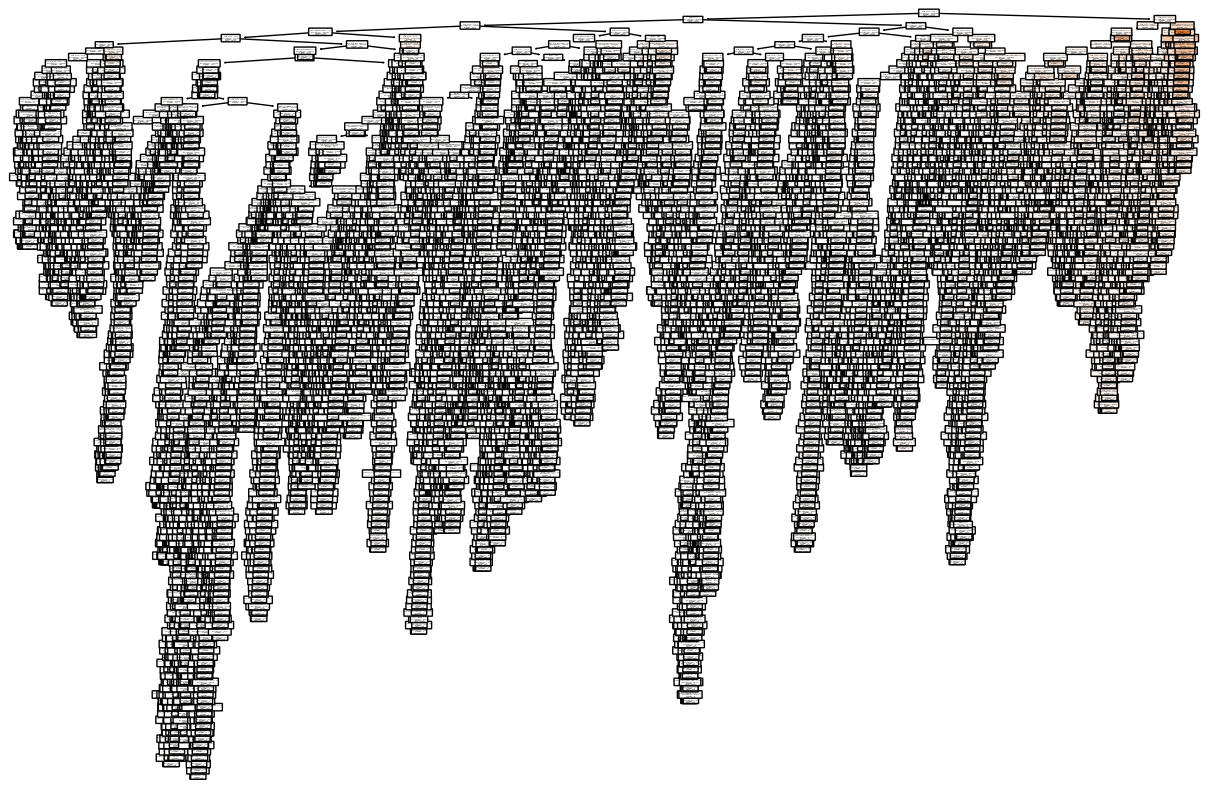

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(DT_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

feature_importances = RF_model.feature_importances_


In [ ]:
len(feature_importances)

1389

### Plot for Random Forest

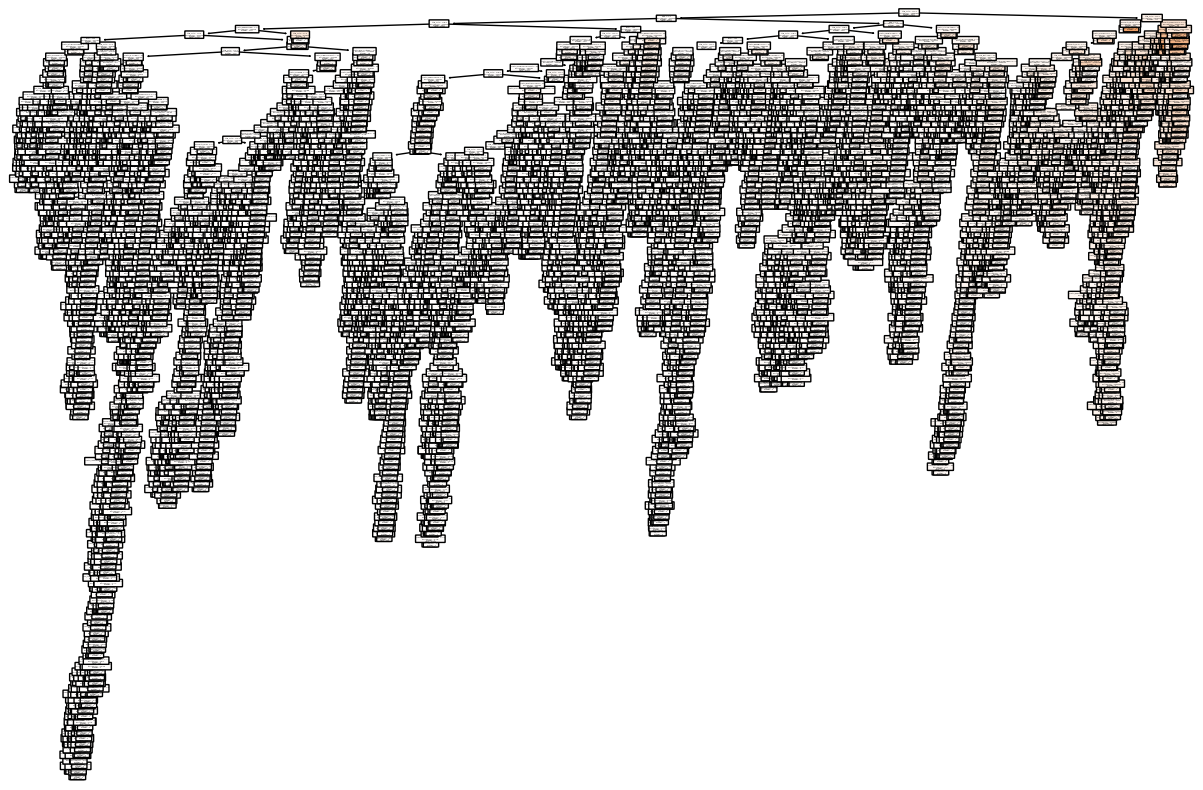

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(RF_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()


# Comparison of Mean Absolute Error and Mean Squared Error for Different Models

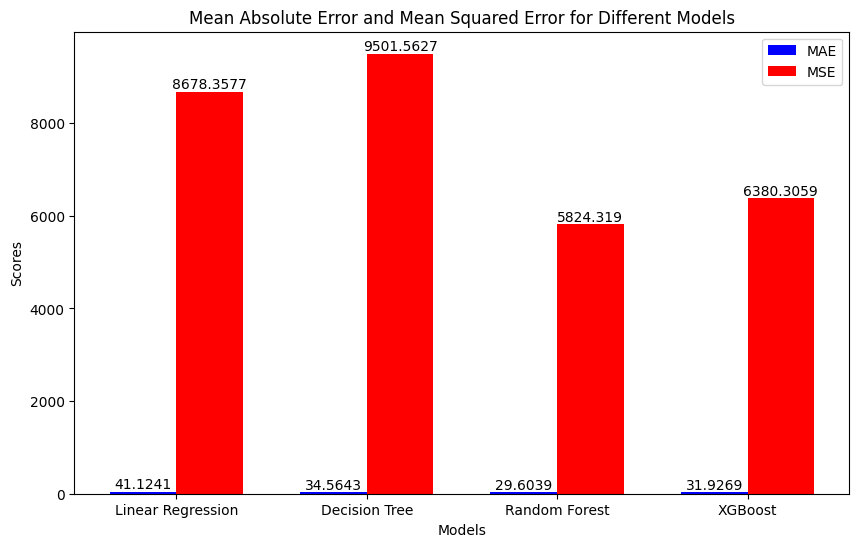

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculating MAE and MSE for each model
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)

mae_DT = mean_absolute_error(y_test, y_pred_DT)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)

mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

# Storing the results in lists for plotting
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores = [mae_LR, mae_DT, mae_RF, mae_XGB]
mse_scores = [mse_LR, mse_DT, mse_RF, mse_XGB]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, mae_scores, bar_width, label='MAE', color='b')
bar2 = ax.bar(index + bar_width, mse_scores, bar_width, label='MSE', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Mean Absolute Error and Mean Squared Error for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Displaying the scores on top of the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


# LIME for RF

In [69]:

from lime.lime_tabular import LimeTabularExplainer

X_test = X_test.sample(n=100, random_state=42)


explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)


instance_to_explain = X_test.iloc[0].values


explanation = explainer.explain_instance(
    instance_to_explain,
    RF_model.predict,
    num_features=10
)

explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [70]:
instance_to_explain = X_test.iloc[1].values


explanation = explainer.explain_instance(
    instance_to_explain,
    RF_model.predict,
    num_features=10
)

explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
